# Example Growth Charts

Work to show the possible examples.

In [84]:
from __future__ import print_function

In [ ]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [85]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import time

import matplotlib as mpl

import datetime






In [86]:

f = open('data/gamelogs.dat')



zero_day = 75
max_day = 300


DDStats = {}

for line in f:
    q = [d.strip(" ") for d in line.split(';')]
    
    if q[0] not in DDStats.keys():
        DDStats[q[0]] = {}
        
    if q[1] not in DDStats[q[0]].keys():
        
        if q[0] in ['OPP','POS','TEAM']:
            DDStats[q[0]][q[1]] = np.zeros(max_day-zero_day,dtype='S5')
            
        else:
            DDStats[q[0]][q[1]] = np.zeros(max_day-zero_day)
        
    for indx in range(0,len(q)-3):
        #print(q[0],q[1],q[indx+2])
        
        if q[0] in ['OPP','POS','TEAM']:
            DDStats[q[0]][q[1]][indx] = q[indx+2]

        else:
            try:
                DDStats[q[0]][q[1]][indx] = float(q[indx+2])
            except:
                DDStats[q[0]][q[1]][indx] = 0.
    


f.close()


print(DDStats.keys())

['OPP', 'BB', 'HR', 'H', 'BO', 'POS', 'PA', 'SO', 'RBI', 'TEAM', 'SB', 'R']


In [87]:

#
# read in team schedule data
#
f = open('data/teamgames.dat','r')

GGDict = {}
for line in f:
    q = [d for d in line.split()]
    GGDict[q[0]] = np.array(q[1:]).astype('int')
    
f.close()


#
# and helper items for translating
#


team_translate = {'angels':'LAA','astros':'HOU','athletics':'OAK',\
                  'bluejays':'TOR','braves':'ATL','brewers':'MIL',\
                  'cardinals':'STL','cubs':'CHC','diamondbacks':'ARI',\
                  'dodgers':'LAD','giants':'SFG','indians':'CLE',\
                  'mariners':'SEA','marlins':'MIA','mets':'NYM',\
                  'nationals':'WSN','orioles':'BAL','padres':'SDP',\
                  'phillies':'PHI','pirates':'PIT','rangers':'TEX',\
                  'rays':'TBR','reds':'CIN','redsox':'BOS',\
                  'rockies':'COL','royals':'KCR','tigers':'DET',\
                  'twins':'MIN','whitesox':'CHW','yankees':'NYY'}


def translate_team(team_translate,inteam):
    '''
    translate between shorthand and longhand fangraphs team names
    
    '''
    
    try:
    
        return np.array(team_translate.keys())[np.where(inteam==np.array(team_translate.values()))[0]][0]

    except:
        
        return ''

    
def generate_schedule(GGDict,team,min_day=75,max_day=300):
    '''
    for a given team, return an array of which calendar days the team played on
    
    
    '''
    
    schedule = []
    
    for i in range(min_day,max_day):
        
        if i in GGDict[team]:
            schedule.append(team)
            
        else:
            schedule.append('')

    return np.array(schedule)







In [104]:
# reorganize with game numbers(e.g. including days the team played and they sat)

zero_day = 75
max_day = 300

GStats = {}

# loop for each stat
for key1 in np.array(DDStats.keys()):
    
    GStats[key1] = {}
    
    # loop for each player
    for key2 in np.array(DDStats[key1].keys()):
        
        # initialize arrays (strings for team names and positions)
        if key1 in ['OPP','POS','TEAM']:
            GStats[key1][key2] = np.zeros(max_day-zero_day,dtype='S5')
            
        # zeros for everything else
        else:
            GStats[key1][key2] = np.zeros(max_day-zero_day)# + np.nan
            
        # step through each calendar day
        gnum = 0 # log of each game number
        for indx,val in enumerate(DDStats[key1][key2]):
            
            # in this loop, indx is the number of days from march 16th
                        
            # step 1: did the player have plate appearances on a given day?
            if DDStats['POS'][key2][indx] != '':
                GStats[key1][key2][gnum] = DDStats[key1][key2][indx]
                gnum += 1
                
            # step 2: were they on the DL?
            
            #
            # here is where the boolean mask gets plugged in
            #
                
            # step 3: if neither of above, did their team play?
            else:
                # identify which team player is on (forward-looking)
                indx1 = 0
                while (DDStats['TEAM'][key2][indx+indx1] == '')  & (indx+indx1+1 < len(DDStats['TEAM'][key2])):

                    indx1 += 1

                # once out of loop, identify which team
                which_team = DDStats['TEAM'][key2][indx+indx1]
                
                # check if team had a game: if yes, advance one day
                if which_team != '':
                    if (indx+zero_day) in GGDict[translate_team(team_translate,which_team)]:
                        #print('off day')
                        GStats[key1][key2][gnum] = 0.#GStats[key1][key2][gnum-1]
                        gnum += 1
                




In [105]:
print(GStats['PA']['Whit Merrifield'])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.   4.   0.
   4.   4.   4.   4.   0.   4.   5.   5.   0.   4.   4.   4.   4.   4.   4.
   4.   6.   0.   4.   3.   4.   5.   4.   4.   3.   4.   4.   3.   4.   3.
   4.   4.   3.   4.   3.   4.   3.   4.   4.   5.   5.   5.   4.   4.   5.
   4.   5.   6.   5.   4.   4.   0.   4.   4.   4.   5.   4.   4.   5.   5.
   0.   5.   9.   5.   4.   5.   6.   4.   5.   4.   4.   4.   5.   5.   5.
   4.   6.   6.   4.   4.   5.   4.   7.   4.   6.   5.   4.   4.   4.   4.
   4.  10.   4.   4.   5.   5.   5.   5.   6.   5.   5.   6.   5.   4.   5.
   4.   5.   4.   4.   4.   4.   4.   5.   4.   5.   4.   5.   5.   3.   6.
   4.   4.   4.   4.   3.   4.   5.   5.   5.   4.   5.   4.   5.   4.   5.
   5.   4.   4.   4.   4.   4.   4.   4.   5.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.  

### Open Questions

1. How to treat DL?
2. How to treat off days?

### Desired Functionality

1. By batting order
2. By position
3. By age
4. By opponent?

956


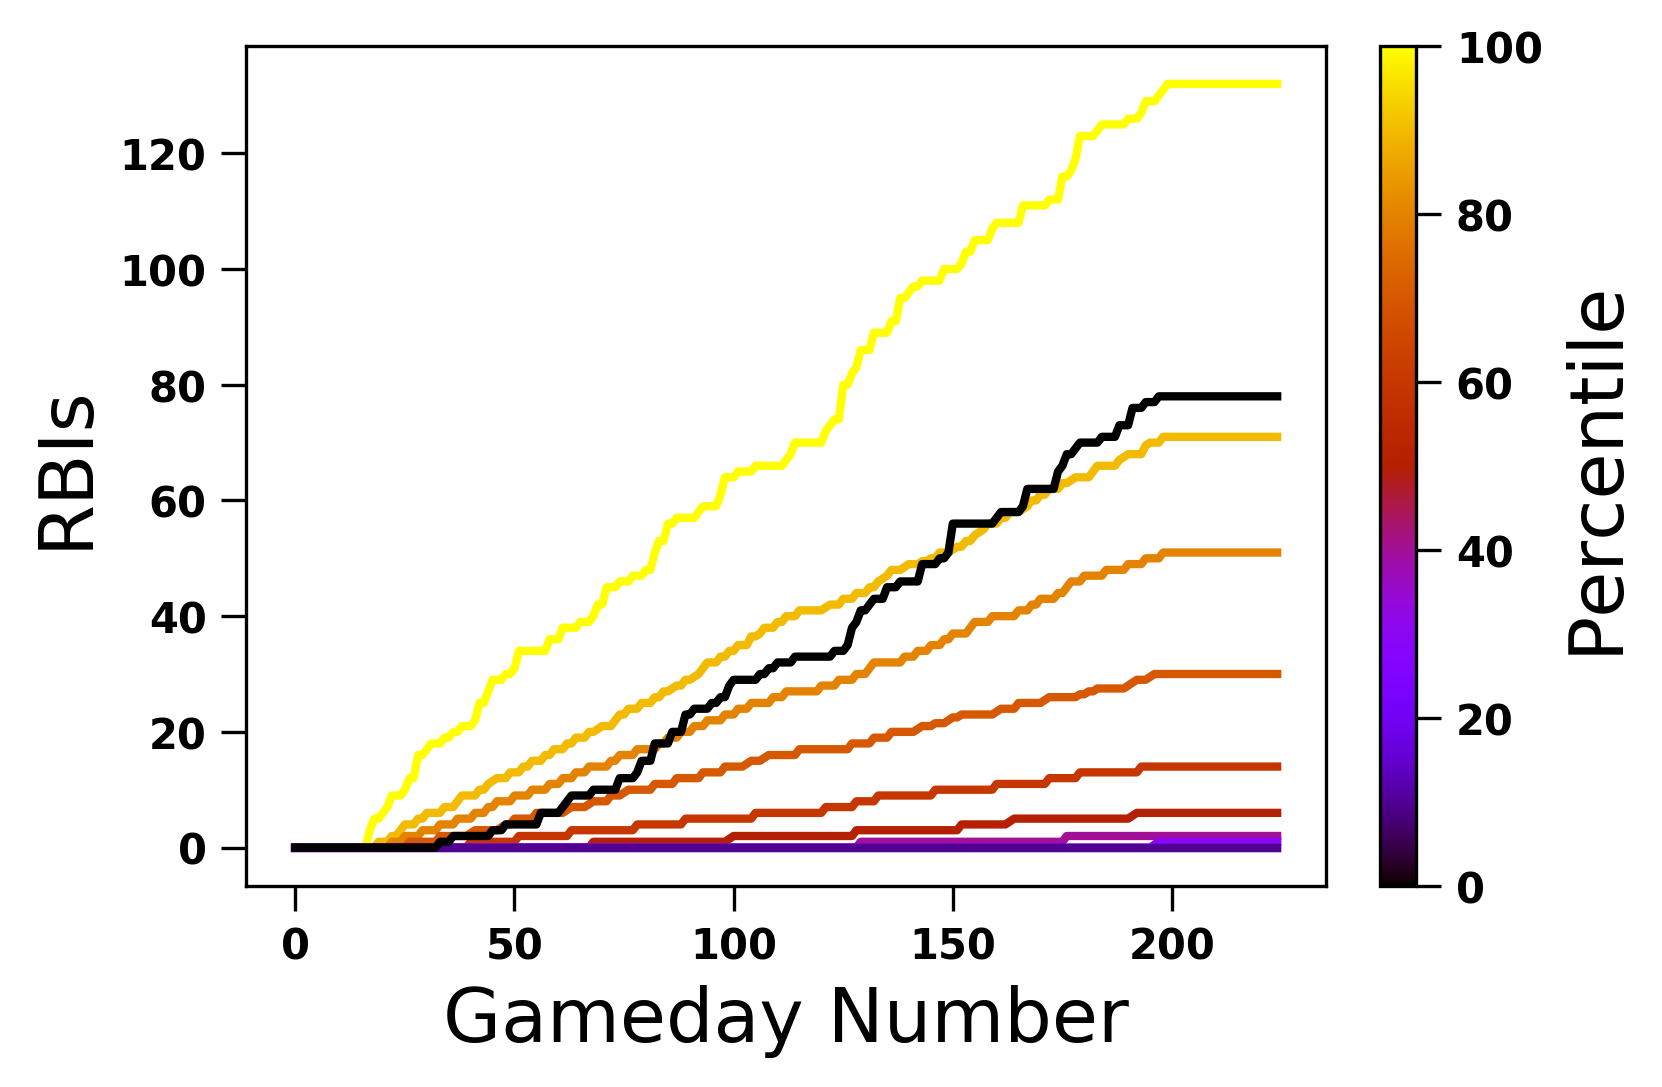

In [8]:
PAlist = np.zeros([len(np.array(DDStats['PA'].keys())),max_day-zero_day])


stat = 'RBI'
print(len(np.array(DDStats[stat].keys())) )

for indx,player in enumerate(DDStats[stat].keys()):
    PAlist[indx] = np.cumsum(DDStats[stat][player])


fig = plt.figure()
ax = fig.add_axes([0.18,0.22,0.6,0.7])
ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
for perc in range(100,0,-10):
    ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))
    

ax.plot(np.cumsum(DDStats[stat]['Whit Merrifield']),color='black')

    
ax.set_ylabel('RBIs',size=18)
ax.set_xlabel('Gameday Number',size=18)
    
cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)





['Keon Broxton', 'A.J. Pollock', 'Mike Trout', 'Rajai Davis', 'Michael Taylor', 'Juan Lagares', 'Adam Jones', 'Albert Almora Jr.', 'Carlos Gomez', 'Curtis Granderson', 'Kevin Kiermaier', 'Jackie Bradley Jr.', 'Manuel Margot', 'Lorenzo Cain', 'Odubel Herrera', 'Mikie Mahtook', 'Christian Yelich', 'Billy Hamilton', 'Jarrod Dyson', 'Guillermo Heredia', 'Dexter Fowler', 'Cameron Maybin', 'Jake Marisnick', 'Kevin Pillar', 'Adam Engel', 'Denard Span', 'Andrew McCutchen', 'Byron Buxton', 'Jacoby Ellsbury', 'Ender Inciarte', 'Charlie Blackmon', 'George Springer', 'Joc Pederson', 'Bradley Zimmer']


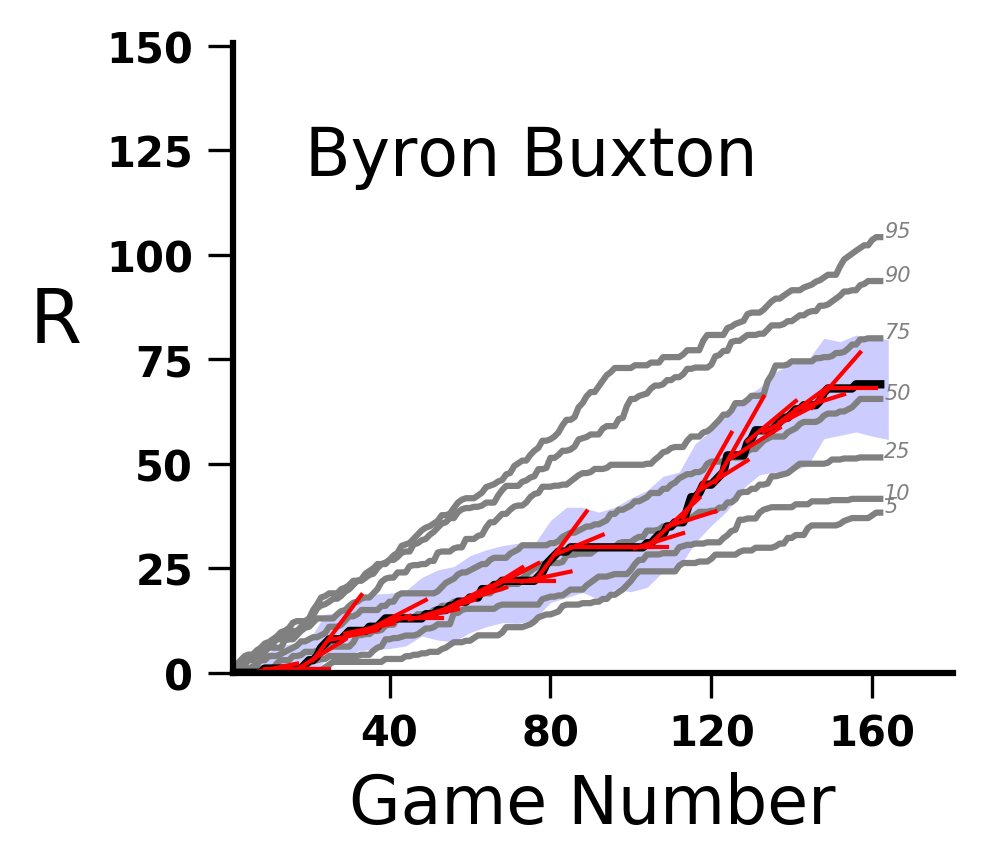

In [307]:


stat = 'R'
pname = 'Byron Buxton'
des_pos = 'CF'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 50:
        plist.append(plr)
        

PAlist = np.zeros([len(plist),max_day-zero_day])

print(plist)


#print(len(np.array(DDStats[stat].keys())) )

#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])


fig = plt.figure(figsize=(4,3),frameon = False)
ax = fig.add_axes([0.25,0.22,0.6,0.7])
#ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
#for perc in range(100,0,-10):
for perc in [95,90,75,50,25,10,5]:


    ax.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax.text(163,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')

from sklearn import linear_model


def fit_porcupine(GStats,stat,pname,window_size=7,resolution=7,extension=7):
    '''
    fit_porcupine
        make a linear regression fit to the data at discrete points
    
    '''
    regr = linear_model.LinearRegression()
    
    mod_x = {}
    mod_points = {}

    for day in range(0, 162, resolution):
        start_day = day
        stop_day = day+window_size + 1
        x = np.arange(1.,len(GStats[stat][pname])+1,1.)
        y = np.cumsum(GStats[stat][pname])

        regr = linear_model.LinearRegression()

        sub_x = x[start_day:stop_day]
        sub_y = y[start_day:stop_day]
        sub_x = sub_x.reshape(start_day-stop_day+1,1)
        sub_y = sub_y.reshape(start_day-stop_day+1,1)

        regr.fit(sub_x, sub_y)

        new_x = (x[start_day:stop_day+extension]).reshape(start_day-stop_day+1,1)
        mod_x[day] = new_x
        mod_points[day] = regr.predict(new_x)

    return mod_x,mod_points
    
    
mod_x,mod_points = fit_porcupine(GStats,stat,pname,window_size=4,resolution=4,extension=8)

import random
    

for key in mod_x.keys():
    if np.max(mod_x[key]) < 162:
        ax.plot(mod_x[key],mod_points[key],color='red',lw=1.)

    
mod_x2,mod_points2 = make_realization(mod_x,mod_points,nreal=100)

err_range = [33.,66.]
pos_error = np.percentile(np.cumsum(mod_points2,axis=1),50.0,axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),err_range[0],axis=0)

neg_error = np.percentile(np.cumsum(mod_points2,axis=1),err_range[1],axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),50.,axis=0)

abs_vals = np.cumsum(GStats[stat][pname])[mod_x2]

#print(np.percentile(np.cumsum(mod_points2,axis=0),20,axis=0))
ax.fill_between(mod_x2,abs_vals-neg_error,abs_vals+pos_error,color='blue',alpha=0.2,linewidth=0.)

  
ax.set_ylabel(stat,size=18,rotation=0, labelpad=12)


ax.set_xticks([40,80,120,160])
ax.set_xlabel('Game Number',size=16)
ax.set_title(pname,size=16, x=.1, y=.75, ha='left')

_ = ax.axis([1,180,0,1.1*np.max(np.nanpercentile(PAlist,100,axis=0))])
    
#cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
#cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
#cb1.set_label('Percentile',size=18)

#fig.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)


plt.savefig('/Users/mpetersen/Desktop/'+pname+'.png',bbox_inches='tight',facecolor='w',dpi=300)
#print(np.where(PAlist[:,150] >= 0.))


In [284]:

from sklearn import linear_model


def fit_porcupine(GStats,stat,pname,window_size=7,resolution=7,extension=7):
    '''
    fit_porcupine
        make a linear regression fit to the data at discrete points
    
    '''
    regr = linear_model.LinearRegression()
    
    mod_x = {}
    mod_points = {}

    for day in range(0, 162-window_size, resolution):
        start_day = day
        stop_day = day+window_size + 2
        x = np.arange(1.,len(GStats[stat][pname])+1,1.)
        y = np.cumsum(GStats[stat][pname])

        regr = linear_model.LinearRegression()

        sub_x = x[start_day:stop_day]
        sub_y = y[start_day:stop_day]
        sub_x = sub_x.reshape(start_day-stop_day+1,1)
        sub_y = sub_y.reshape(start_day-stop_day+1,1)

        regr.fit(sub_x, sub_y)

        new_x = (x[start_day:stop_day+extension]).reshape(start_day-stop_day+1,1)
        mod_x[day] = new_x
        mod_points[day] = regr.predict(new_x)

    return mod_x,mod_points
    
    
mod_x,mod_points = fit_porcupine(GStats,stat,pname,window_size=7,resolution=7,extension=0)



In [285]:


def make_realization(mod_x,mod_points,nreal=100):
    nkeys = len(np.array(mod_x.keys()))

    keyres = (np.max(np.array(mod_x.keys())) - np.min(np.array(mod_x.keys())))/nkeys + 1

    mod_x2 = np.arange(0,np.max(np.array(mod_x.keys()))+1,keyres)

    nreal = 200    

    mod_x2 = np.arange(0,np.max(np.array(mod_x.keys()))+keyres+1,keyres)

    mod_points2 = np.zeros([nreal,len(mod_x2)])

    for iteration in range(0,nreal):

        for keystep in range(1,nkeys+1):
            #print(keystep)

            randval = random.choice(mod_points.keys())
            
            #print(np.max(mod_points[randval])-np.min(mod_points[randval]))


            mod_points2[iteration,keystep] = np.max(mod_points[randval])-np.min(mod_points[randval])

    return mod_x2,mod_points2
            

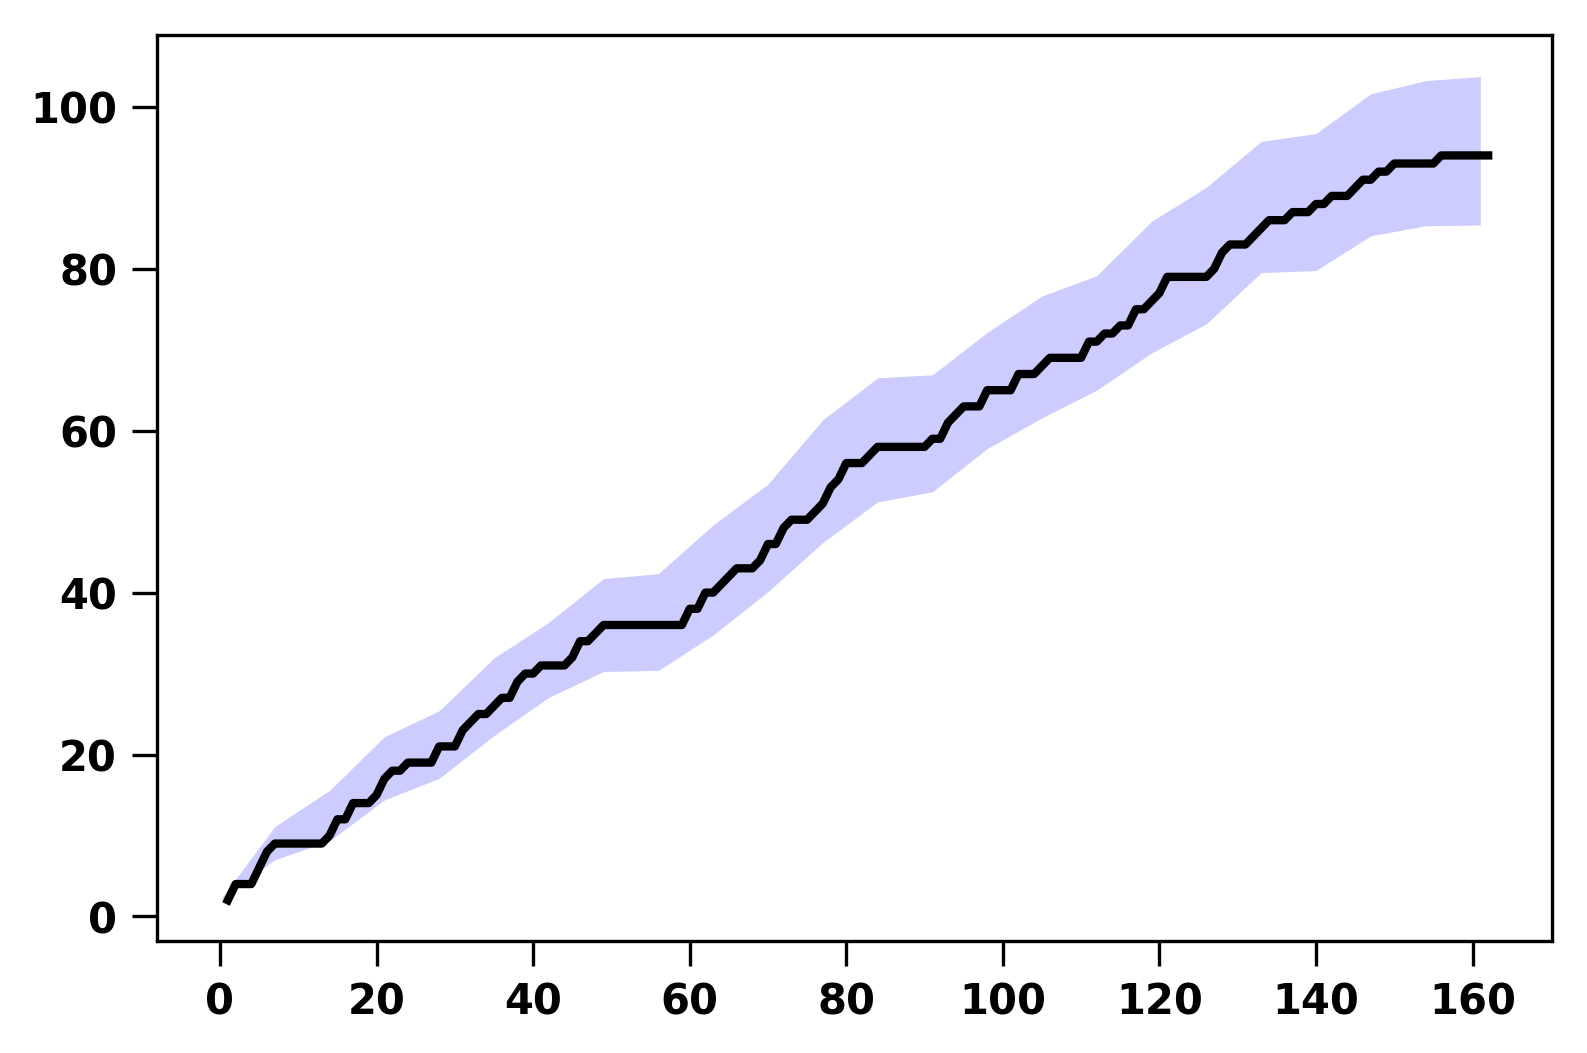

In [293]:

#confidence_lo = np.zeros(len(mod_x2))
#confidence_hi = np.zeros(len(mod_x2))

mod_x2,mod_points2 = make_realization(mod_x,mod_points,nreal=100)

plt.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')

pos_error = np.percentile(np.cumsum(mod_points2,axis=1),50.0,axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),16.7,axis=0)

neg_error = np.percentile(np.cumsum(mod_points2,axis=1),83.7,axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),50.,axis=0)

abs_vals = np.cumsum(GStats[stat][pname])[mod_x2]

#print(np.percentile(np.cumsum(mod_points2,axis=0),20,axis=0))
plt.fill_between(mod_x2,abs_vals-neg_error,abs_vals+pos_error,color='blue',alpha=0.2,linewidth=0.)

  

In [ ]:
    #ax.plot(np.array([np.arange(1,len(GStats[stat]['Jose Altuve'])+1,1)[day],np.arange(1,len(GStats[stat]['Jose Altuve'])+1,1)[day+window_size]]),\
    #       np.array([lm.predict(np.arange(1,len(GStats[stat]['Jose Altuve'])+1,1)[day]),lm.predict(np.arange(1,len(GStats[stat]['Jose Altuve'])+1,1)[day+window_size])]),\
    #       color='gray')
    
    

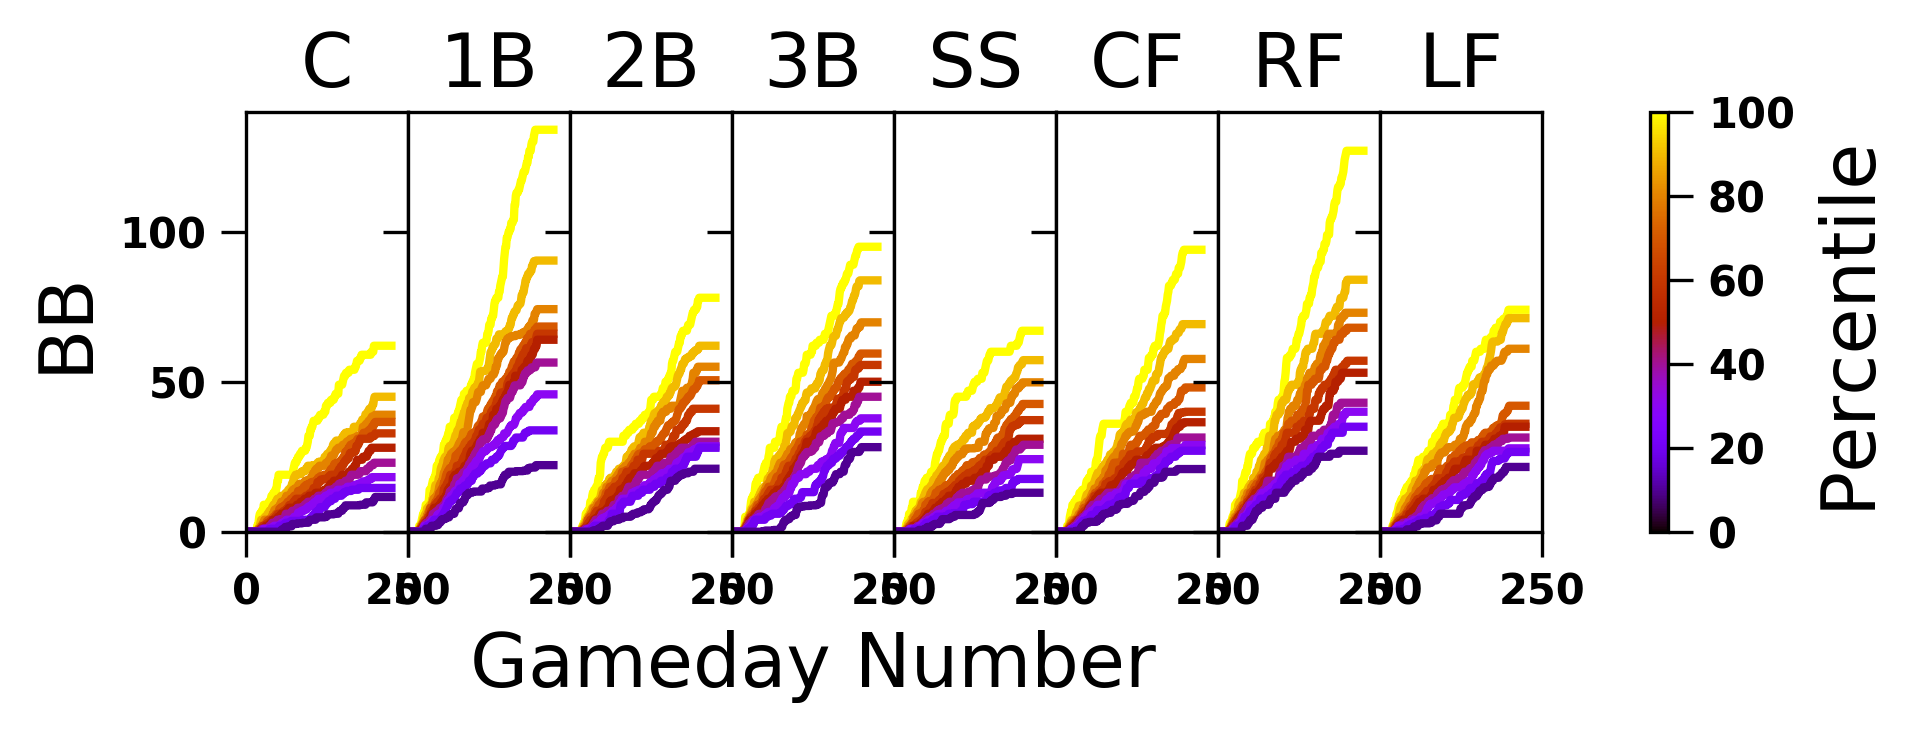

In [10]:

fig = plt.figure(figsize=(6,2))

for indx1,des_pos in enumerate(np.array(['C','1B','2B','3B','SS','CF','RF','LF'])):
    
    ax = fig.add_axes([0.12+(indx1*(0.75-.12)/7.),0.22,(0.75-.12)/7.,0.7])


    plist = []

    for indx,plr in enumerate(DDStats['POS'].keys()):
        
        try:
            if len(np.where(DDStats['POS'][plr] == des_pos)[0]) > 50:
                plist.append(plr)
        except:
            pass


    PAlist = np.zeros([len(plist),max_day-zero_day])



    stat = 'BB'
    #print(len(np.array(DDStats[stat].keys())) )

    #for indx,player in enumerate(DDStats[stat].keys()):
    for indx,player in enumerate(np.array(plist)):

        PAlist[indx] = np.cumsum(DDStats[stat][player])






    for perc in range(100,0,-10):
        ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))


    #ax.plot(np.cumsum(DDStats[stat]['Jose Altuve']),color='black')


    if indx1==0: 
        ax.set_ylabel(stat,size=18)
    else:
        ax.set_yticklabels(())
        
    if indx1==3: ax.set_xlabel('Gameday Number',size=18)
    ax.set_title(des_pos,size=18)

    ax.axis([0.0,250.,0.,140.])
    

ax2 = fig.add_axes([0.90,0.22,0.01,0.7])


cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)





In [ ]:

fig = plt.figure(figsize=(6,2))

for indx1,des_pos in enumerate(np.array(['C','1B','2B','3B','SS','CF','RF','LF'])):
    
    ax = fig.add_axes([0.12+(indx1*(0.75-.12)/7.),0.22,(0.75-.12)/7.,0.7])


    plist = []

    for indx,plr in enumerate(DDStats['POS'].keys()):
        
        try:
            if len(np.where(DDStats['POS'][plr] == des_pos)[0]) > 50:
                plist.append(plr)
        except:
            pass


    PAlist = np.zeros([len(plist),max_day-zero_day])



    stat = 'HR'
    #print(len(np.array(DDStats[stat].keys())) )

    #for indx,player in enumerate(DDStats[stat].keys()):
    for indx,player in enumerate(np.array(plist)):

        PAlist[indx] = np.cumsum(DDStats[stat][player])






    for perc in range(100,0,-10):
        ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))


    #ax.plot(np.cumsum(DDStats[stat]['Jose Altuve']),color='black')


    if indx1==0: 
        ax.set_ylabel(stat,size=18)
    else:
        ax.set_yticklabels(())
        
    if indx1==3: ax.set_xlabel('Gameday Number',size=18)
    ax.set_title(des_pos,size=18)

    ax.axis([0.0,250.,0.,50.])
    

ax2 = fig.add_axes([0.90,0.22,0.01,0.7])


cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)






In [ ]:
AgeDict = np.genfromtxt('data/teamdict.dat',\
            dtype=[('team','S8'),('player','S20'),('age','i4')],delimiter='|')

print(AgeDict['age'][np.where(AgeDict['player']=='Joey Votto')][0])

In [ ]:

fig = plt.figure(figsize=(6,2))

for indx1,des_age in enumerate(np.array([25.,26.,27.,28.,29.,30.,31.,32.])):
    
    ax = fig.add_axes([0.12+(indx1*(0.75-.12)/7.),0.22,(0.75-.12)/7.,0.7])


    plist = []

    for indx,plr in enumerate(AgeDict['age']):
        
        try:
            if AgeDict['age'][indx] == des_age:
                if AgeDict['player'][indx] in DDStats['R'].keys():
                    if len(np.where(DDStats['PA'][AgeDict['player'][indx]] > 0.)[0]) > 50.:
                        plist.append(AgeDict['player'][indx])
        except:
            pass


    #print(len(plist),plist[0],plist[1])
    PAlist = np.zeros([len(plist),max_day-zero_day])



    stat = 'H'
    #print(len(np.array(DDStats[stat].keys())) )

    #for indx,player in enumerate(DDStats[stat].keys()):
    for indx,player in enumerate(np.array(plist)):

        PAlist[indx] = np.cumsum(DDStats[stat][player])






    for perc in range(100,0,-10):
        ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))


    #ax.plot(np.cumsum(DDStats[stat]['Jose Altuve']),color='black')


    if indx1==0: 
        ax.set_ylabel(stat,size=18)
    else:
        ax.set_yticklabels(())
        
    if indx1==3: ax.set_xlabel('Gameday Number',size=18)
    
    #ax.set_title(len(plist),size=18)
    ax.set_title(int(des_age),size=18)

    ax.axis([0.0,250.,0.,220.])
    

ax2 = fig.add_axes([0.90,0.22,0.01,0.7])


cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)







In [12]:

print(GGDict['reds'])

[ 93  95  96  97  98  99 100 101 102 103 104 105 106 108 109 110 111 112
 113 114 115 116 118 120 121 122 123 124 125 126 127 128 129 131 132 133
 134 136 137 138 139 140 141 142 143 144 146 147 148 149 150 151 153 154
 155 156 157 158 159 160 161 162 163 164 165 167 168 169 170 171 172 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 234
 235 236 237 238 239 241 242 243 244 245 246 247 248 249 250 251 252 253
 255 256 257 258 259 260 262 263 264 265 266 267 269 270 271 272 273 274]


In [13]:

#
# read in team game data
#
f = open('data/teamgames.dat','r')

GGDict = {}
for line in f:
    q = [d for d in line.split()]
    GGDict[q[0]] = np.array(q[1:]).astype('int')
    
f.close()


#
# and helper items for translating
#


team_translate = {'angels':'LAA','astros':'HOU','athletics':'OAK',\
                  'bluejays':'TOR','braves':'ATL','brewers':'MIL',\
                  'cardinals':'STL','cubs':'CHC','diamondbacks':'ARI',\
                  'dodgers':'LAD','giants':'SFG','indians':'CLE',\
                  'mariners':'SEA','marlins':'MIA','mets':'NYM',\
                  'nationals':'WSN','orioles':'BAL','padres':'SDP',\
                  'phillies':'PHI','pirates':'PIT','rangers':'TEX',\
                  'rays':'TBR','reds':'CIN','redsox':'BOS',\
                  'rockies':'COL','royals':'KCR','tigers':'DET',\
                  'twins':'MIN','whitesox':'CHW','yankees':'NYY'}


def translate_team(team_translate,inteam):
    
    try:
    
        return np.array(team_translate.keys())[np.where(inteam==np.array(team_translate.values()))[0]][0]

    except:
        
        return ''

    
def generate_schedule(GGDict,team,min_day=75,max_day=300):
    
    schedule = []
    
    for i in range(min_day,max_day):
        
        if i in GGDict[team]:
            schedule.append(team)
            
        else:
            schedule.append('')

    return np.array(schedule)





In [24]:
jvotto = np.array([translate_team(team_translate,q) for q in DDStats['TEAM']['Jose Altuve']])

print([np.unique(jvotto)[q] for q in range(0,len(np.unique(jvotto)))][1])

astros


In [39]:
gplayed = []

for player in DDStats['TEAM'].keys():
    
    #print(player)
    
    pp = np.array([translate_team(team_translate,q) for q in DDStats['TEAM'][player]])

    #print([np.unique(player)[q] for q in range(0,len(np.unique(player)))][1])
    teamsch = generate_schedule(GGDict,[np.unique(pp)[q] for q in range(0,len(np.unique(pp)))][1])

    #print('{0:24s}{1:3d}'.format(player,162-len(np.where(np.array([(pp[q]==teamsch[q]) for q in range(0,len(teamsch))] )==False)[0])))


    gplayed.append(162-len(np.where(np.array([(pp[q]==teamsch[q]) for q in range(0,len(teamsch))] )==False)[0]))


gplayed = np.array(gplayed)

#for i in range(0,len(jvotto)):
#    if redssch[i] != '':
#        print(redssch[i],jvotto[i])

#print(GGDict['rockies']-75)

Rougned Odor
Freddy Galvis
Alcides Escobar
Eric Hosmer
Joey Votto


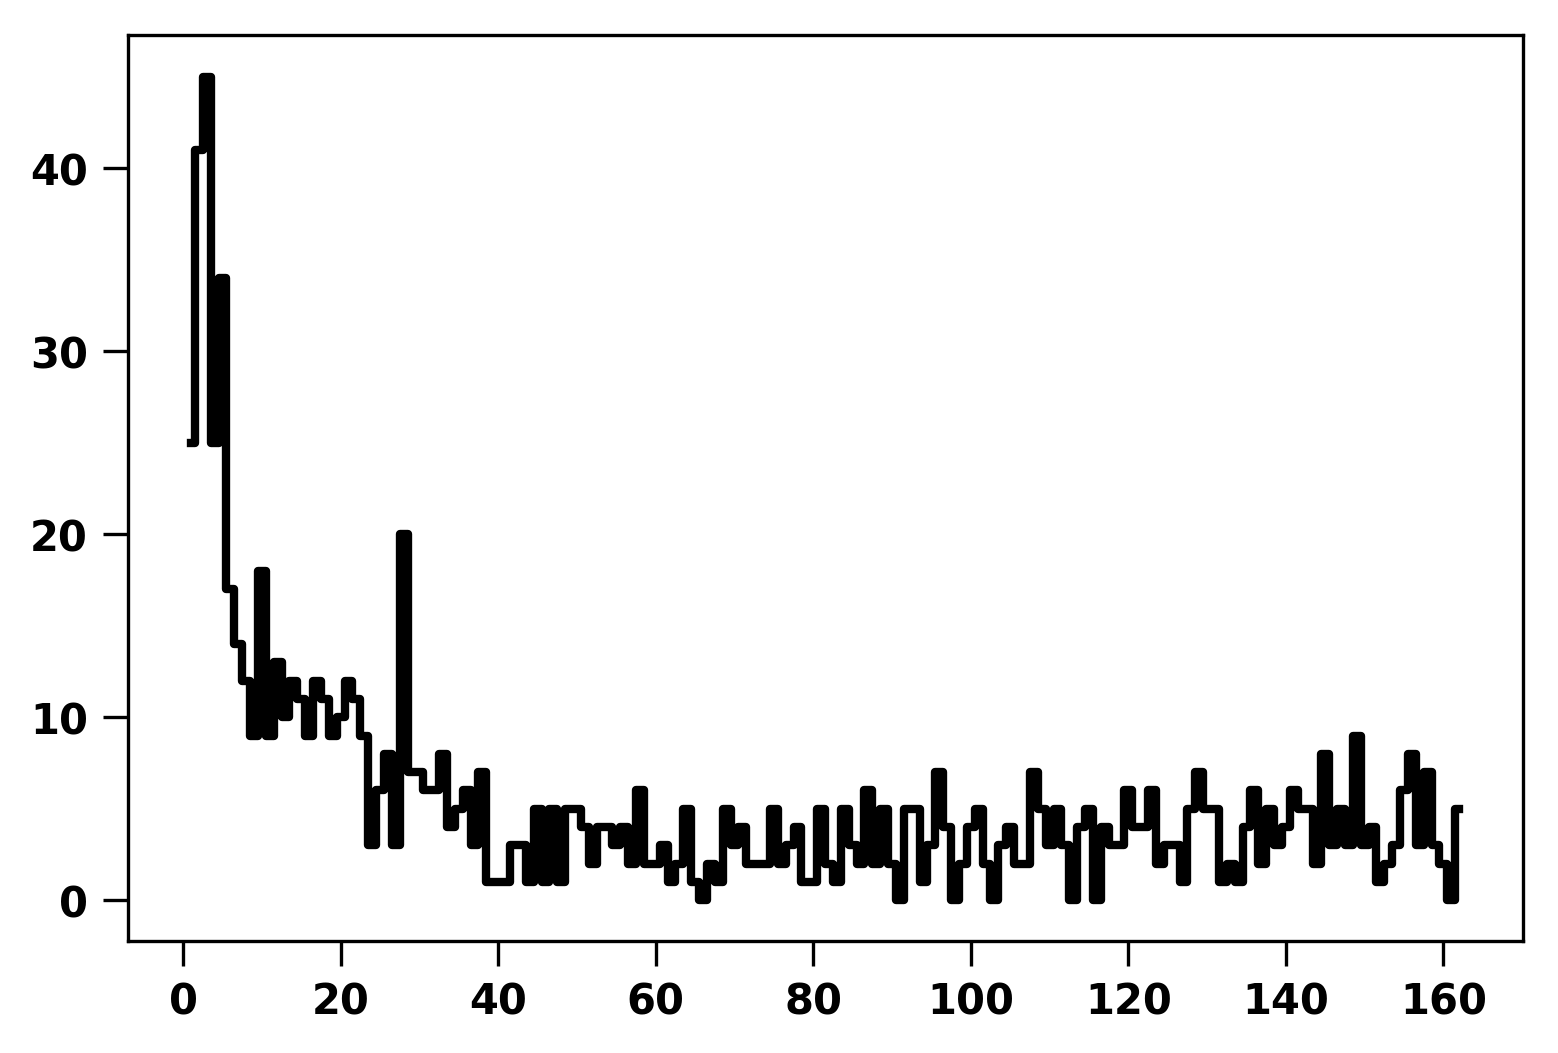

In [49]:
cts,bins = np.histogram(gplayed, bins=np.arange(0.5,163.5,1.))

plt.plot(np.arange(1,163,1),cts,linestyle='steps-mid',color='black')

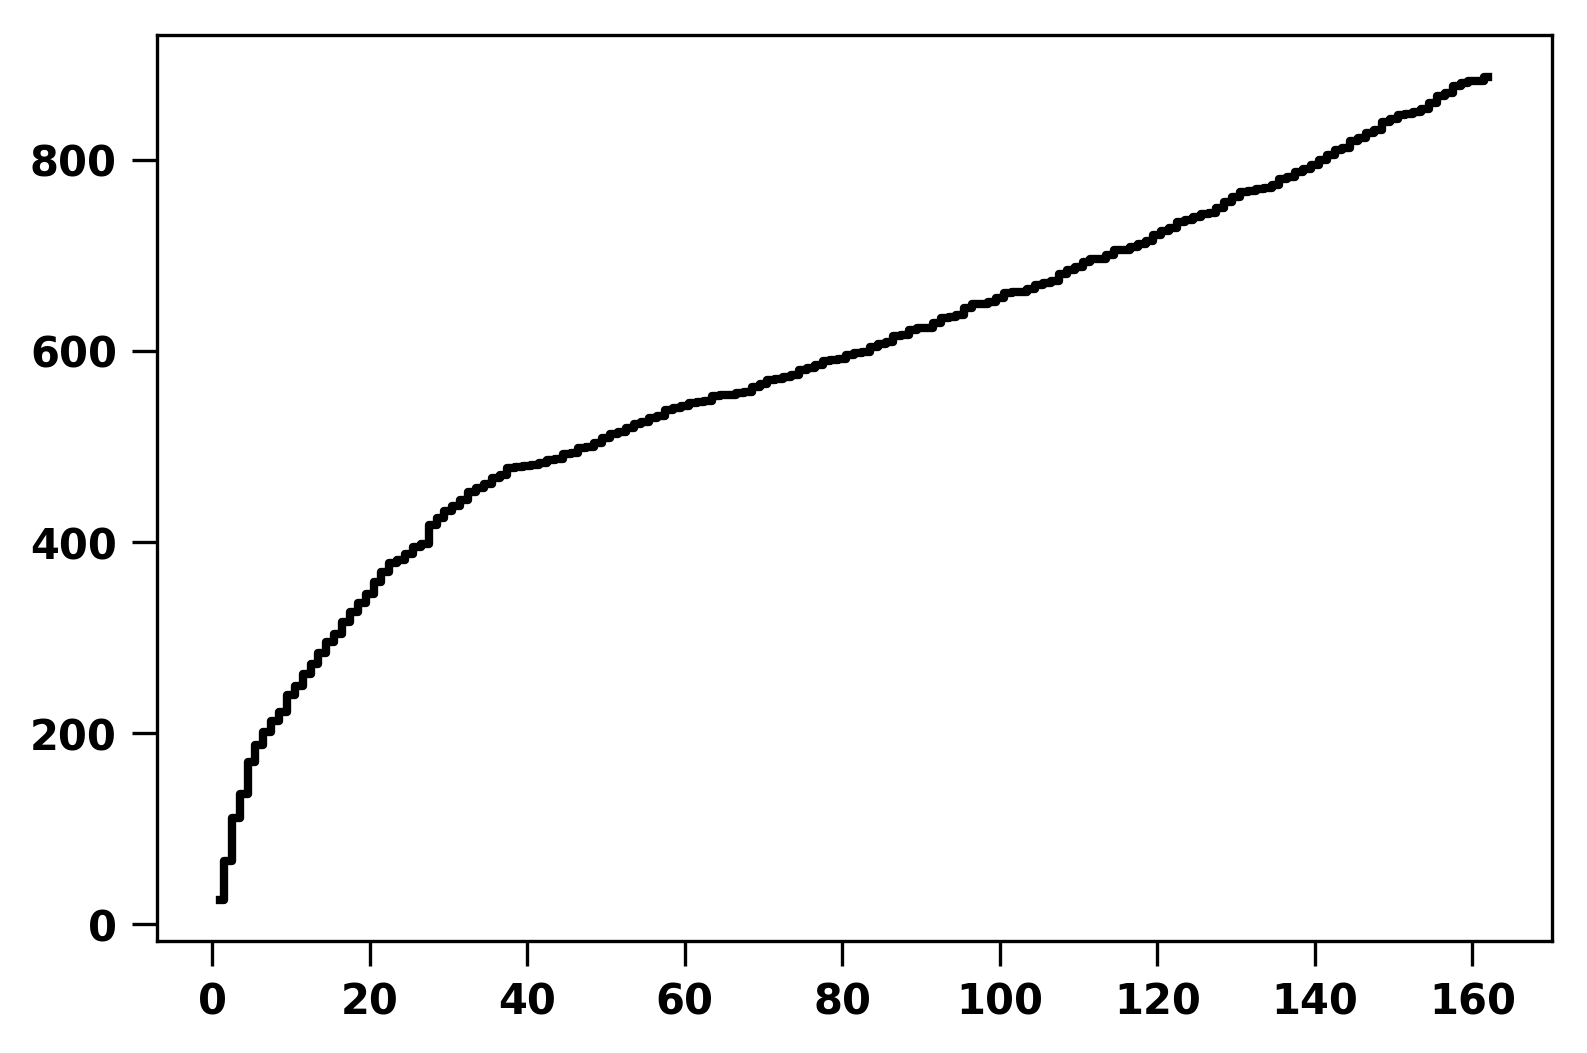

In [50]:
plt.plot(np.arange(1,163,1),np.cumsum(cts),linestyle='steps-mid',color='black')

In [80]:
# reorganize with game numbers(e.g. including days the team played and they sat)

zero_day = 75
max_day = 300

GStats = {}

for key1 in np.array(DDStats.keys()):
    
    GStats[key1] = {}
    
    for key2 in np.array(DDStats[key1].keys()):
        
        if key1 in ['OPP','POS','TEAM']:
            GStats[key1][key2] = np.zeros(max_day-zero_day+50,dtype='S5')
            
        else:
            GStats[key1][key2] = np.zeros(max_day-zero_day+50) + np.nan
            
        gnum = 0
        for indx,val in enumerate(DDStats[key1][key2]):
            
            #print(indx,val.strip('@'))
            
            if DDStats['POS'][key2][indx] != '':
                GStats[key1][key2][gnum] = DDStats[key1][key2][indx]
                gnum += 1
                
            else:
                # identify which team (forward-looking)
                indx1 = 0
                while (DDStats['TEAM'][key2][indx+indx1] == '') & (indx1 < 3) & (indx < 210):
                    #print(indx,key2)
                    indx1 += 1
                    
                if indx1 == 10:
                    pass
                    #print('last game')
                    
                which_team = (DDStats['TEAM'][key2][indx+indx1]).strip('@')
                
                # check if team had a game
                if which_team != '':
                    if (indx+zero_day) in GGDict[translate_team(team_translate,which_team)]:
                        #print('off day')
                        GStats[key1][key2][gnum] = GStats[key1][key2][gnum-1]
                        gnum += 1
                
        #print(key2,gnum)


In [81]:
GStats['R']['Giovanny Urshela']

array([ nan,  nan,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         2.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  n

['Rougned Odor', 'Logan Forsythe', 'Cesar Hernandez', 'Brandon Phillips', 'Jose Peraza', 'Yangervis Solarte', 'Cliff Pennington', 'Jose Ramirez', 'Kolten Wong', 'Neil Walker', 'Daniel Descalso', 'Jason Kipnis', 'Jose Altuve', 'Scooter Gennett', 'Daniel Murphy', 'Josh Harrison', 'Dustin Pedroia', 'Jonathan Villar', 'Carlos Asuaje', 'Ian Kinsler', 'Starlin Castro', 'Yoan Moncada', 'Ozzie Albies', 'Whit Merrifield', 'Javier Baez', 'Robinson Cano', 'Darwin Barney', 'Dee Gordon', 'Jonathan Schoop', 'DJ LeMahieu', 'Brian Dozier', 'Eric Sogard', 'Devon Travis', 'Jed Lowrie', 'Joe Panik', 'Ronald Torreyes', 'Brandon Drury', 'Danny Espinosa', 'Chase Utley', 'Yolmer Sanchez', 'Brad Miller']
(array([ 0,  3,  4,  7, 10, 12, 13, 14, 24, 25, 26, 27, 28, 29, 30, 33, 34,
       35, 36, 38]),)


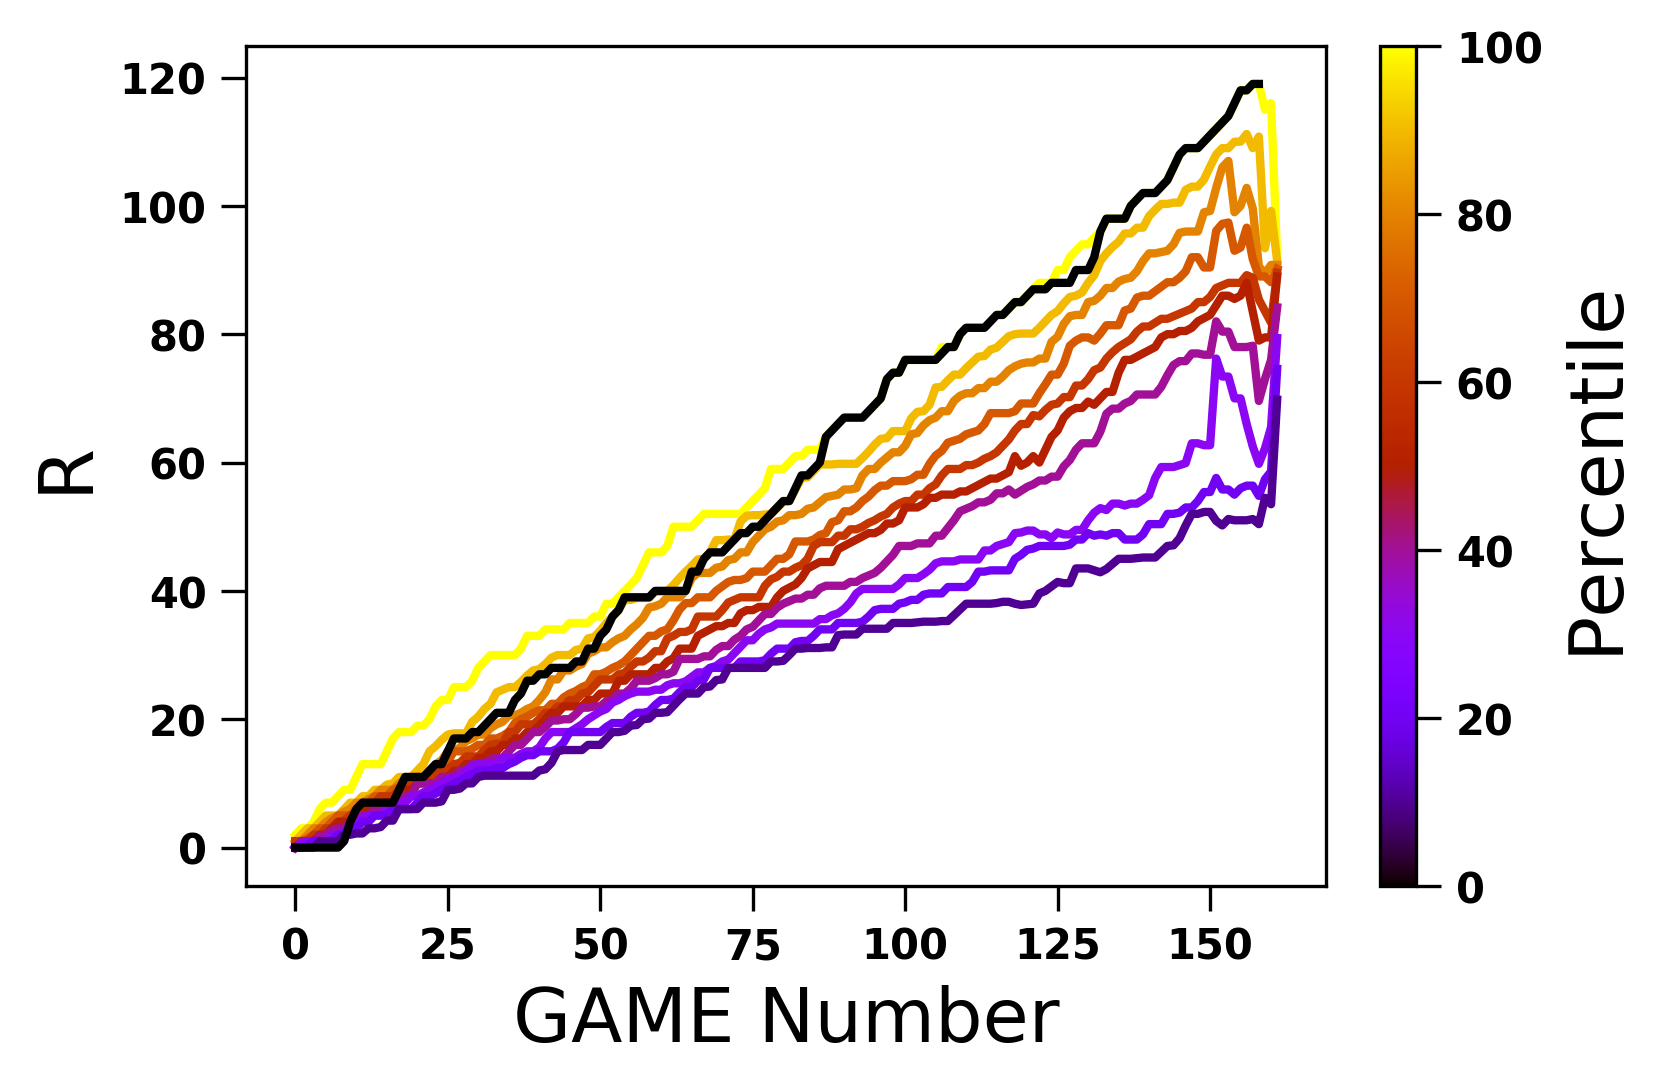

In [83]:

buff = 50
des_pos = '2B'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 50:
        plist.append(plr)
        

        
print(plist)
PAlist = np.zeros([len(plist),max_day-zero_day+buff])



stat = 'R'
#print(len(np.array(DDStats[stat].keys())) )

#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])


fig = plt.figure()
ax = fig.add_axes([0.18,0.22,0.6,0.7])
ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
for perc in range(100,0,-10):
    ax.plot(np.nanpercentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))
    

ax.plot(np.cumsum(GStats[stat]['Jose Altuve']),color='black')

    
ax.set_ylabel(stat,size=18)
ax.set_xlabel('GAME Number',size=18)
    
cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)


print(np.where(PAlist[:,150] >= 0.))

